# E Commerce Shipping fixed using ML 

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)

In [2]:
df = pd.read_csv('Train.csv')
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [4]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


# EDA analysis

<Axes: xlabel='Reached.on.Time_Y.N', ylabel='Weight_in_gms'>

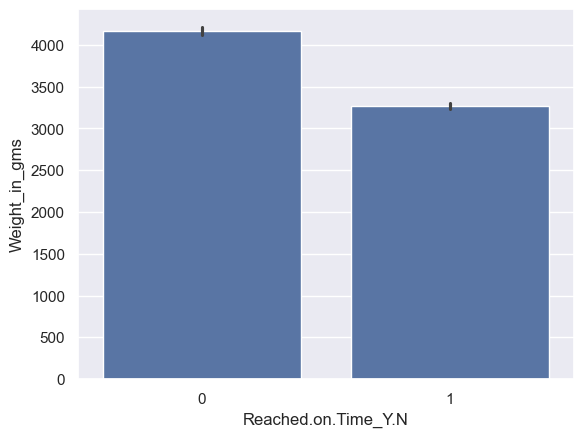

In [19]:
sns.barplot(data=df,x='Reached.on.Time_Y.N', y='Weight_in_gms')

# heavy weight items are most likely to be late than light weight items

<Axes: xlabel='Reached.on.Time_Y.N', ylabel='Discount_offered'>

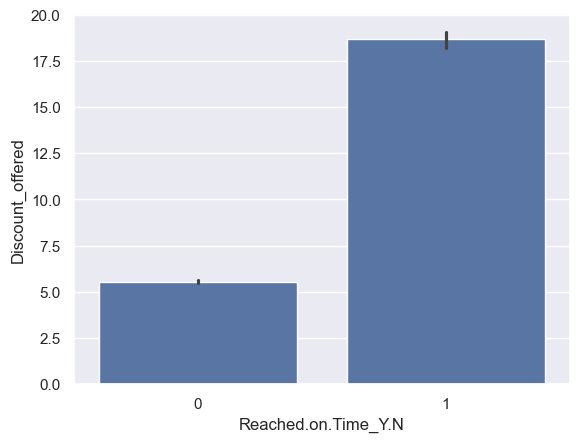

In [20]:
sns.barplot(data=df,x='Reached.on.Time_Y.N', y='Discount_offered')

# huge discount offered items are ontme.

<Axes: xlabel='Reached.on.Time_Y.N', ylabel='Cost_of_the_Product'>

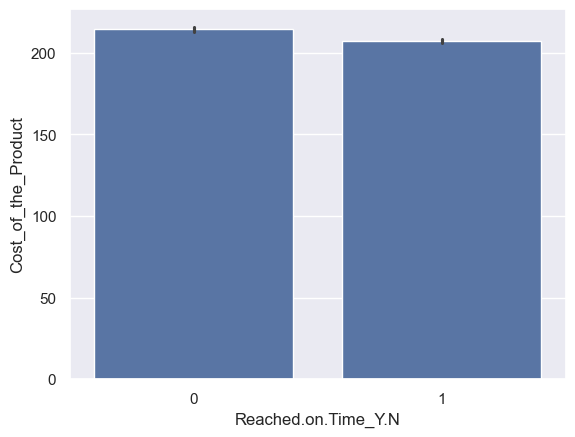

In [21]:
sns.barplot(data=df,x='Reached.on.Time_Y.N', y='Cost_of_the_Product')

<Axes: xlabel='Reached.on.Time_Y.N', ylabel='count'>

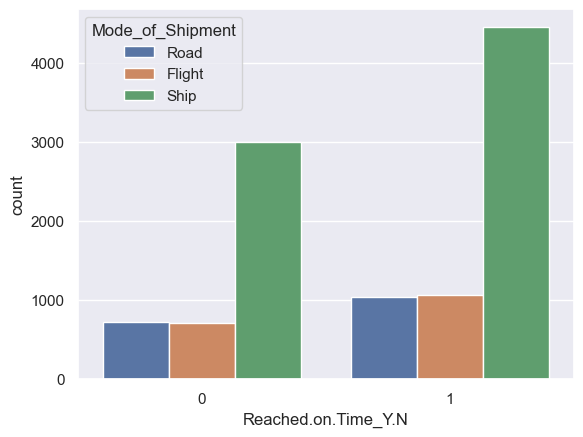

In [25]:
sns.countplot(data=df,x='Reached.on.Time_Y.N', hue='Mode_of_Shipment')

# compare  mode of shipment there ship mode is high other then

<Axes: xlabel='Reached.on.Time_Y.N', ylabel='count'>

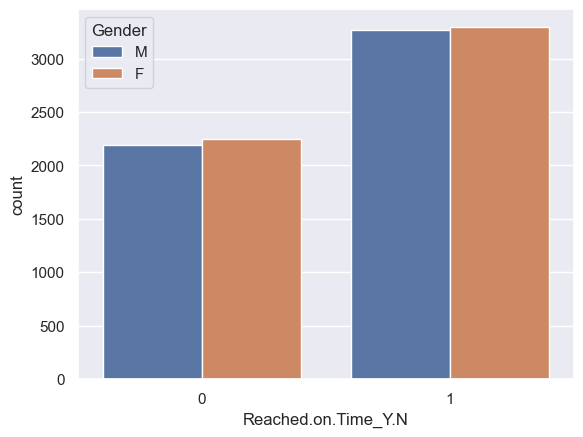

In [28]:
sns.countplot(data=df,x='Reached.on.Time_Y.N', hue='Gender')

<Axes: xlabel='Reached.on.Time_Y.N', ylabel='count'>

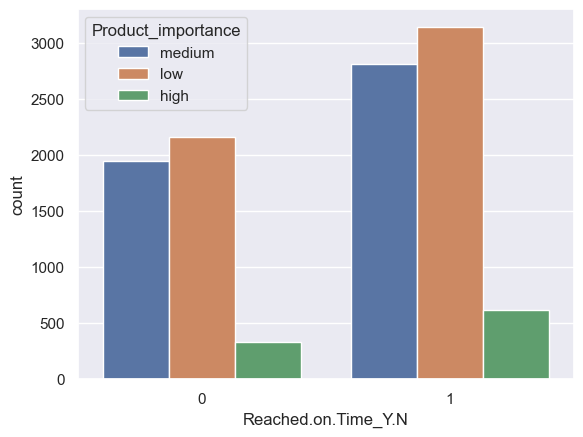

In [30]:
sns.countplot(data=df,x='Reached.on.Time_Y.N', hue='Product_importance')


# Data Preprocessing

In [31]:
df['Warehouse_block'].unique()

array(['D', 'F', 'A', 'B', 'C'], dtype=object)

In [34]:
df['Mode_of_Shipment'].unique()

array(['Flight', 'Ship', 'Road'], dtype=object)

In [35]:
df['Product_importance'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [36]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

### label encoding

In [39]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Warehouse_block'] =le.fit_transform(df['Warehouse_block'])
df['Warehouse_block'].unique()

array([3, 4, 0, 1, 2])

In [40]:
df['Mode_of_Shipment'] =le.fit_transform(df['Mode_of_Shipment'])
df['Mode_of_Shipment'].unique()

array([0, 2, 1])

In [41]:
df['Product_importance'] =le.fit_transform(df['Product_importance'])
df['Product_importance'].unique()

array([1, 2, 0])

In [43]:
df['Gender']= le.fit_transform(df['Gender'])
df['Gender'].unique()

array([0, 1])

In [45]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,3,0,4,2,177,3,1,0,44,1233,1
1,2,4,0,4,5,216,2,1,1,59,3088,1
2,3,0,0,2,2,183,4,1,1,48,3374,1
3,4,1,0,3,3,176,4,2,1,10,1177,1
4,5,2,0,2,2,184,3,2,0,46,2484,1


In [47]:
# convert object data types column to integer

df['Warehouse_block'] = pd.to_numeric(df['Warehouse_block'])
df['Mode_of_Shipment'] = pd.to_numeric(df['Mode_of_Shipment'])
df['Product_importance'] = pd.to_numeric(df['Product_importance'])
df['Gender'] = pd.to_numeric(df['Gender'])

df.dtypes

ID                     int64
Warehouse_block        int32
Mode_of_Shipment       int32
Customer_care_calls    int64
Customer_rating        int64
Cost_of_the_Product    int64
Prior_purchases        int64
Product_importance     int32
Gender                 int32
Discount_offered       int64
Weight_in_gms          int64
Reached.on.Time_Y.N    int64
dtype: object

# check the outliers

<Axes: xlabel='Cost_of_the_Product'>

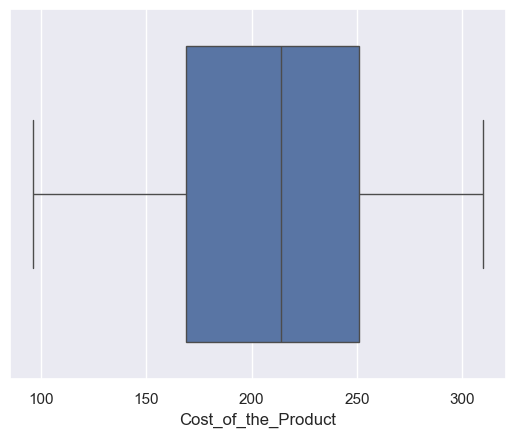

In [48]:
sns.boxplot(x=df['Cost_of_the_Product'])

<Axes: xlabel='Discount_offered'>

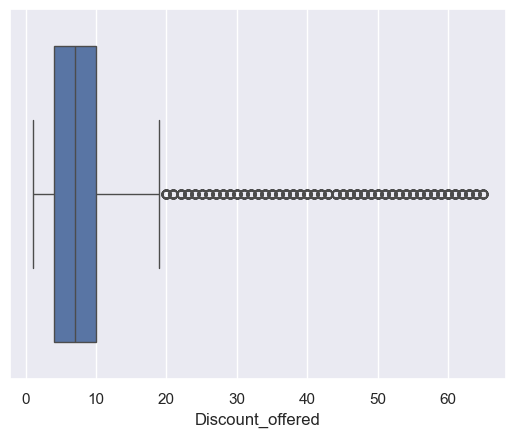

In [49]:
sns.boxplot(x=df['Discount_offered'])

<Axes: xlabel='Weight_in_gms'>

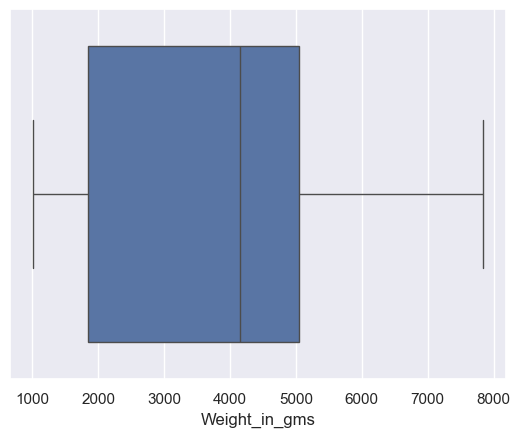

In [50]:
sns.boxplot(x=df['Weight_in_gms'])

In [52]:
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,3,0,4,2,177,3,1,0,44,1233,1
1,2,4,0,4,5,216,2,1,1,59,3088,1
2,3,0,0,2,2,183,4,1,1,48,3374,1
3,4,1,0,3,3,176,4,2,1,10,1177,1
4,5,2,0,2,2,184,3,2,0,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,0,2,4,1,252,5,2,0,1,1538,1
10995,10996,1,2,4,1,232,5,2,0,6,1247,0
10996,10997,2,2,5,4,242,5,1,0,4,1155,0
10997,10998,4,2,5,2,223,6,2,1,2,1210,0


# delete the outlier using z-score

In [51]:
import scipy.stats as stats
z = np.abs(stats.zscore(df))
data_clean = df[(z<3).all(axis=1)]
data_clean.shape

(10642, 12)

# balance the class value

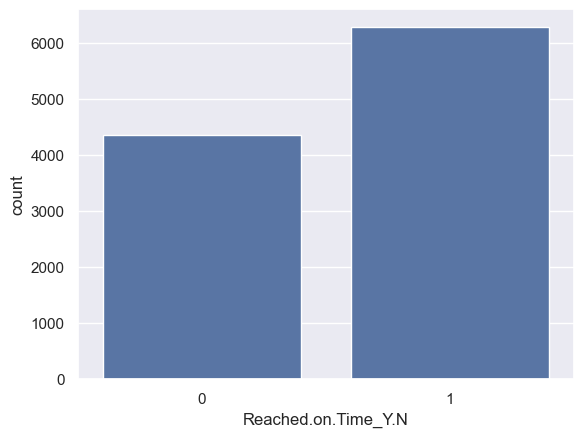

Reached.on.Time_Y.N
1    6282
0    4360
Name: count, dtype: int64

In [55]:
# count 1,0 value 

sns.countplot(x=data_clean['Reached.on.Time_Y.N'])
plt.show()
data_clean['Reached.on.Time_Y.N'].value_counts()

In [56]:
from sklearn.utils import resample

# create two diffrent dataframe of majority and minority class
df_majority = data_clean[(data_clean['Reached.on.Time_Y.N'] == 1)]
df_minority = data_clean[(data_clean['Reached.on.Time_Y.N'] == 0)]

# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                replace = True, # sample with replacement
                                n_samples=6282, # to match majority class
                                random_state=0)

# combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

Reached.on.Time_Y.N
0    6282
1    6282
Name: count, dtype: int64

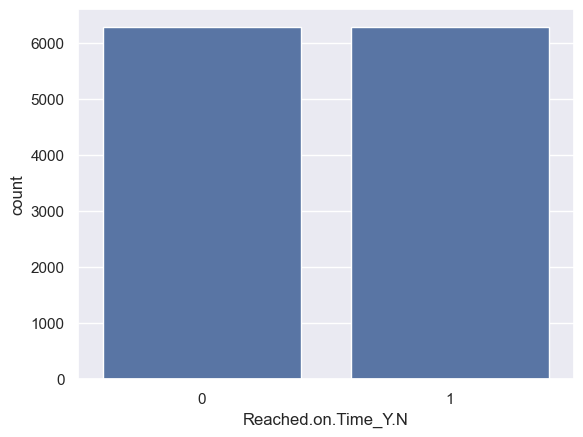

In [58]:
sns.countplot(x=df_upsampled['Reached.on.Time_Y.N'])
df_upsampled['Reached.on.Time_Y.N'].value_counts()

# data correlation

<Axes: >

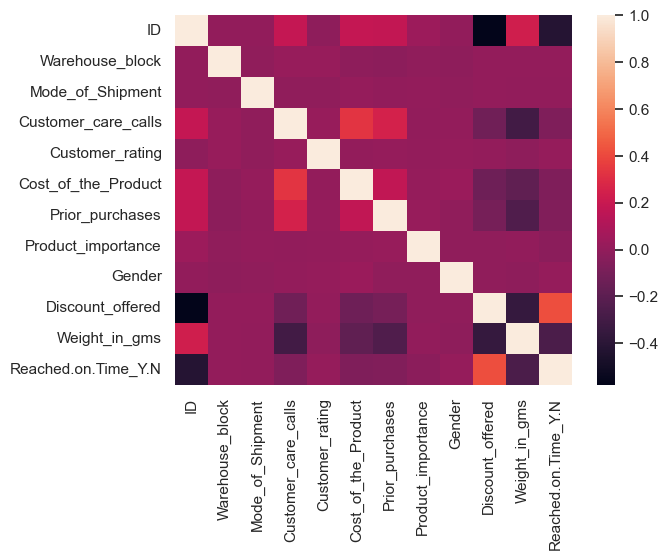

In [59]:
sns.heatmap(df_upsampled.corr(), fmt='.2g')

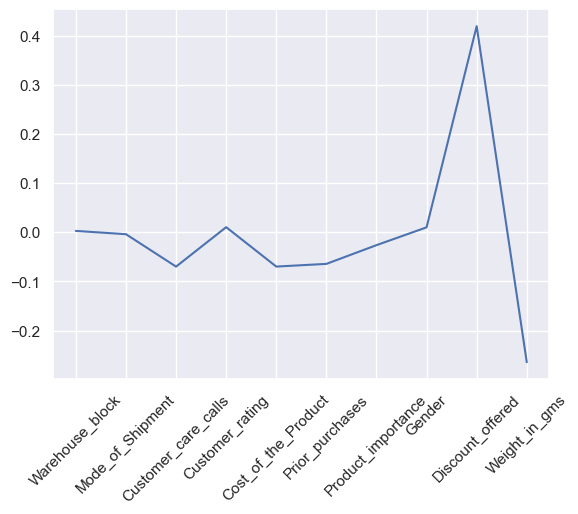

In [66]:
corr = df_upsampled[df_upsampled.columns[1:]].corr()['Reached.on.Time_Y.N'][:-1]
plt.plot(corr)
plt.xticks(rotation=45)
plt.show()

# Mechine Learning Model Building

In [60]:
X = df_upsampled.drop('Reached.on.Time_Y.N', axis=1)
y = df_upsampled['Reached.on.Time_Y.N']

In [61]:
# train size 80 % and test size 20 %
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=0)

# Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\Shehan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [67]:
y_pred = lr.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy Score: 0.6872264226024671
Confusion Matrix:
 [[1036  176]
 [ 610  691]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.85      0.72      1212
           1       0.80      0.53      0.64      1301

    accuracy                           0.69      2513
   macro avg       0.71      0.69      0.68      2513
weighted avg       0.72      0.69      0.68      2513



Text(0.5, 1.0, 'Accuracy Score: 68.72264226024672')

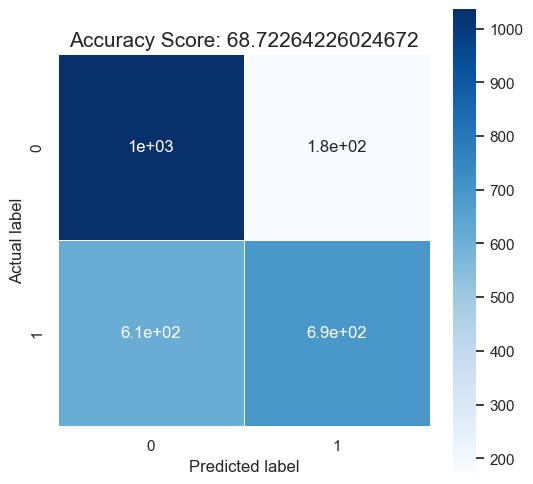

In [69]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(data=cm, linewidths=.5, annot=True, square= True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(lr.score(X_test, y_test)*100)
plt.title(all_sample_title, size= 15)

# Random Forest Classifier

In [73]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [74]:
y_pred = rfc.predict(X_test)

In [75]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy Score: 0.7425387982491046
Confusion Matrix:
 [[1087  125]
 [ 522  779]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.90      0.77      1212
           1       0.86      0.60      0.71      1301

    accuracy                           0.74      2513
   macro avg       0.77      0.75      0.74      2513
weighted avg       0.77      0.74      0.74      2513



Text(0.5, 1.0, 'Accuracy Score: 74.25387982491046')

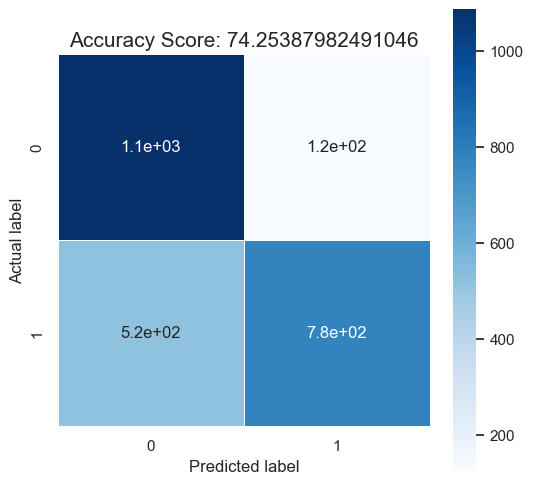

In [76]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(data=cm, linewidths=.5, annot=True, square= True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(rfc.score(X_test, y_test)*100)
plt.title(all_sample_title, size= 15)

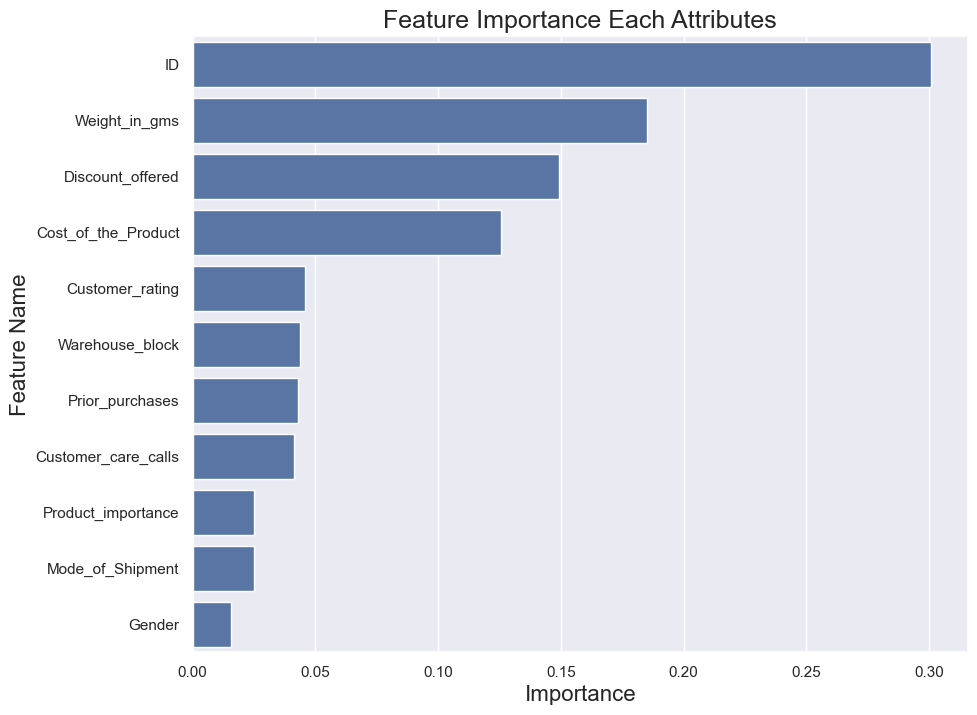

In [81]:
# feature imporance
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(data=fi, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

# Decision Tree Classifier

In [82]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [83]:
y_pred = dtree.predict(X_test)

In [84]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy Score: 0.7855153203342619
Confusion Matrix:
 [[1023  189]
 [ 350  951]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.84      0.79      1212
           1       0.83      0.73      0.78      1301

    accuracy                           0.79      2513
   macro avg       0.79      0.79      0.79      2513
weighted avg       0.79      0.79      0.79      2513



Text(0.5, 1.0, 'Accuracy Score: 78.55153203342618')

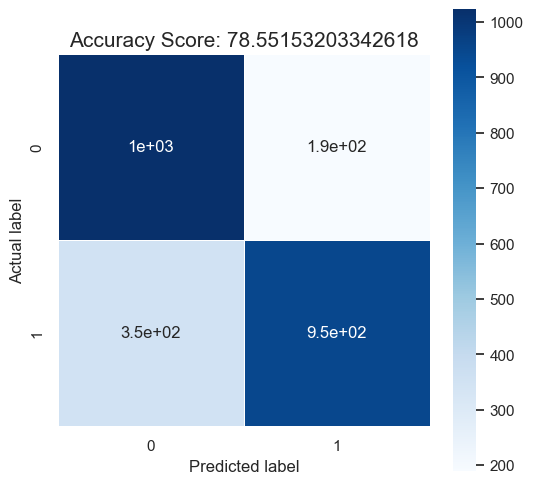

In [85]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(data=cm, linewidths=.5, annot=True, square= True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test)*100)
plt.title(all_sample_title, size= 15)

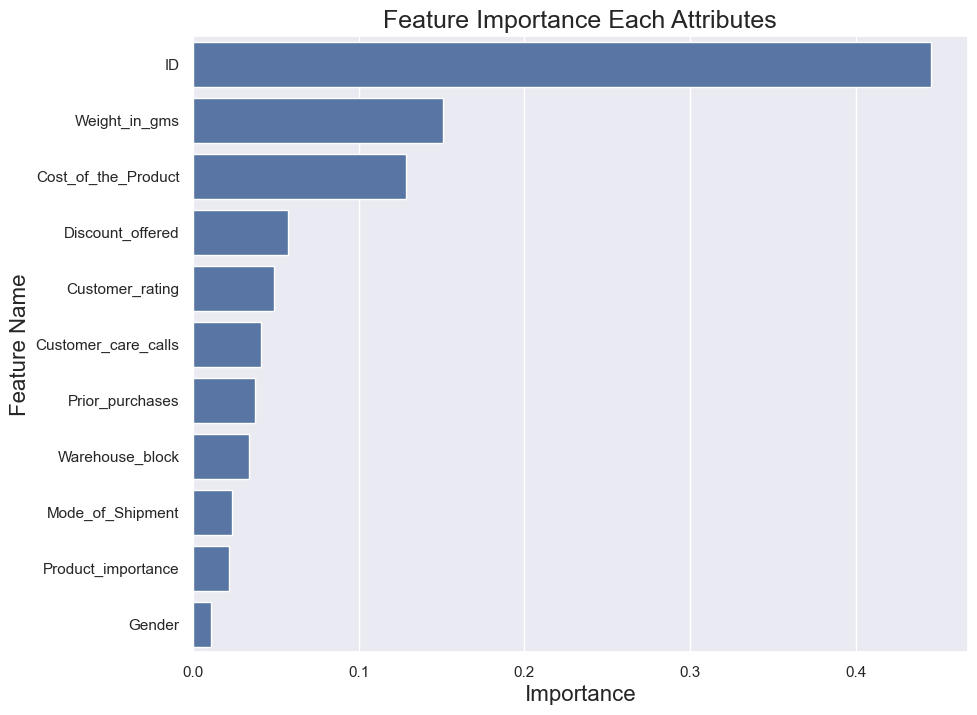

In [86]:
# feature imporance
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(data=fi, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

# conclusion - compare among three models there Decision Tree Classifier is the best model 